###Introduction

The purpose of this report was to establish a base model by which to compare additional models. For this reason, the simplest of neural network models was selected to test the image data. The initial intention was to construct a classic machine learning model, but such models required more computational resources compared to what was available. Dealing with images as tensors was much more computationally efficient and manageable. Therefore, for the base model a simple sequential convolutional network was created for the purposes of this report. 

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import math
from tensorflow.keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The initial steps were to import relevant libraries, import the dataset, scale the data. As mentioned in the EDA report, the validation data set was utilized as the test data set. For this reason, a validation set was created by splitting  the training set. This split was done directly within the image data generator by allocating 17.5% of the train data set as the validation set. 17.5% was chosen simply because it roughly equates to the size of the test data set. 

Within the image data generators, all images were rescaled, randomly rotated, randomly flipped, shuffled, and split into batches of 256 images. These manipulations were to implement as much randomness into the data as possible, while simultaneously maintaining the integrity of the images. Since these images were round cells without obvious directional polarity, rotatating and flipping the cells should not affect the integrity of the sequential model. Finally, based on the analysis of colour distribution in the previous EDA report, images were forced to retain their colors before being passed into the model. 

In [ ]:
# Create training image data generator.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range = 180, 
                                   horizontal_flip = True, 
                                   vertical_flip = True, 
                                   validation_split = 0.175)

# Finaly we specify where the images should be loaded from as well as some additional attributes:
train_generator = train_datagen.flow_from_directory('/content/drive/Othercomputers/My MacBook Air/BrainStation/Capstone/capstone_data/training_data', 
                                                    target_size = (256, 256),
                                                    batch_size = 256, 
                                                    color_mode = 'rgb', 
                                                    class_mode = 'categorical',
                                                    shuffle = True, 
                                                    subset = 'training')

validation_generator = train_datagen.flow_from_directory('/content/drive/Othercomputers/My MacBook Air/BrainStation/Capstone/capstone_data/training_data', 
                                                         target_size = (256, 256), 
                                                         batch_size = 256,
                                                         color_mode = 'rgb', 
                                                         class_mode = 'categorical',
                                                         shuffle = True, 
                                                         subset = 'validation')

Found 8796 images belonging to 2 classes.
Found 1865 images belonging to 2 classes.


###Instantiating the model

Sequential models are constructed by "adding" layers and then adjusting the parameters of each individual layer. The model constructed for this report was created with three 2-demnsional convlution layers, followed by a flattened layer and 2 dense layers. The convolutional layers recieved the most adjustment in terms of parameter optimization. Regularizers were established on these layers with the sole purpose of reducing overfitting. Two regularizers were available, L1 and L2, with the option to utilize both regularizers in conjuntion for each parameter. Ultimately, L2 was chosen as the sole regularizer since it specifically serves the function of reducing overfitting. Each convolutional layer was also given a dropout function, since doing so also reduces overfitting... All three layers were also given maximum pooling layers... The final output layer of this model was set to a sigmoid activating dense layer with two outputs. This  output layer serves to provide a binary classification between two final results, those being cancerous and non-cancerous. Since the purpose of the model is a binary classifier, binary cross entropy was also selected as the loss function. 

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, 
                 activation = 'relu',
                 kernel_regularizer = regularizers.L2(0.01),
                 activity_regularizer = regularizers.L2(0.01), 
                 input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(32, (3,3), 1, 
                 activation='relu', 
                 kernel_regularizer = regularizers.L2(0.01),
                 activity_regularizer = regularizers.L2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Conv2D(16, (3,3), 1, 
                 activation='relu',
                 kernel_regularizer = regularizers.L2(0.01),
                 activity_regularizer = regularizers.L2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
#model.summary()

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           patience = 5, 
                           mode = 'min', 
                           verbose = 1)

hist = model.fit(train_generator, 
                 validation_data = validation_generator, 
                 epochs = 30,
                 callbacks = [early_stop])

Epoch 1/30
35/35 [==============================] - 228s 6s/step - loss: 2.6592 - accuracy: 0.6977 - val_loss: 0.9006 - val_accuracy: 0.7383
Epoch 2/30
35/35 [==============================] - 217s 6s/step - loss: 0.7665 - accuracy: 0.8109 - val_loss: 0.7461 - val_accuracy: 0.7453
Epoch 3/30
35/35 [==============================] - 208s 6s/step - loss: 0.6449 - accuracy: 0.8130 - val_loss: 0.6727 - val_accuracy: 0.7437
Epoch 4/30
35/35 [==============================] - 203s 6s/step - loss: 0.5816 - accuracy: 0.8179 - val_loss: 0.6451 - val_accuracy: 0.7421
Epoch 5/30
35/35 [==============================] - 204s 6s/step - loss: 0.5555 - accuracy: 0.8190 - val_loss: 0.6158 - val_accuracy: 0.7426
Epoch 6/30
35/35 [==============================] - 209s 6s/step - loss: 0.5303 - accuracy: 0.8192 - val_loss: 0.6019 - val_accuracy: 0.7437
Epoch 7/30
35/35 [==============================] - 226s 7s/step - loss: 0.5202 - accuracy: 0.8158 - val_loss: 0.5962 - val_accuracy: 0.7437
Epoch 8/30
35

###Analysis of Model Performance

For the purposes of this preliminary report, an early stop was set in place for this model based on insufficient improvements in lowering validation loss. Since this model was stopped early, this model might have room for further parameter optimization. Ultimately, this model didn't seem to showcase effective performance, with obvious overfitting of the test data when analyzingthe analysis curve. In most scenarios, any neural network would continuously be optimized in an iterative process. For the purposes of this preliminary report, analysis was continued as if this model had been completely optimized.

AttributeError: ignored

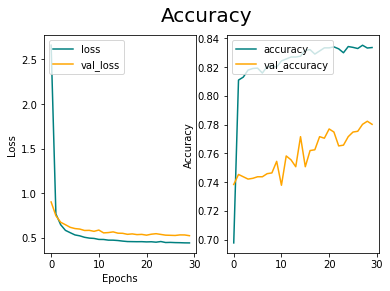

In [ ]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 
         color = 'teal', 
         label = 'loss')
plt.plot(hist.history['val_loss'], 
         color = 'orange', 
         label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc = "upper left")
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 
         color = 'teal', 
         label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 
         color = 'orange', 
         label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc = "upper left")
plt.ylabel('Accuracy')
plt.xlable('Epochs')

plt.show()

The final phase of analysis was to assess the models performance on the testing data. Just as for the training and validation data, the testing data was imported via an image generator. However, because the validation dataset was labelled differently than the training set, a different methodology was used to import the data. A dataframe for the test set was created as described in the previous EDA report. From this dataframe, the test data was imported and labelled to be tested on the sequential model. The same parameter optimizations that were utilized for the training and validation generators were utilized for the test generator as well. 

In [ ]:
df_test = pd.read_csv("/content/drive/Othercomputers/My MacBook Air/BrainStation/Capstone/capstone_data/test_data/val_data.csv", 
                      dtype = str)
df_test

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1
...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1
1863,UID_55_24_1_all.bmp,1864.bmp,1
1864,UID_H32_20_1_hem.bmp,1865.bmp,0
1865,UID_54_30_2_all.bmp,1866.bmp,1


In [ ]:
# Apply the same rescaling factor as our other generators
test_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range = 180, 
                                  horizontal_flip = True, 
                                  vertical_flip = True)
test_generator = test_datagen.flow_from_dataframe(dataframe = df_test,
                                                  directory = '/content/drive/Othercomputers/My MacBook Air/BrainStation/Capstone/capstone_data/test_data',
                                                  target_size = (256, 256),
                                                  batch_size = 256,
                                                  x_col = 'new_names',
                                                  y_col = 'labels',
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical')

X_test, y_test = validation_generator.next() # <-- Validation data was used for all further analysis as opposed to the test data

Found 1867 validated image filenames belonging to 2 classes.


In [ ]:
# Evaluate the model's performance on the test data
score = model.evaluate(X_test, 
                       y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 21ms/step - loss: 0.4928 - accuracy: 0.7852
Test loss: 0.49278146028518677
Test accuracy: 0.78515625


In [ ]:
# Calculate the predictions
predict_probas = model.predict(X_test)

# Convert probabilities to label encoding
y_predict = np.argmax(predict_probas, axis=1)

###Final analysis

This model showcased a test accuracy of 78.5%. The confusion matrix below allowed for further analysis of the general performance of the model per each batch of 256 images. 

This model was extremely unlikely to predict that any cell was a normal lymphoblast. Considering the distribution of the data, where only 31.79% of all images were healthy lymphoblasts in the training dataset, this wasn't surprising. However, thhis model should have still predicted normal lymphoblasts 31% of the time, accounting for about 77 predictions. Instead, based on the confusion matrix, the model only predicted 29 healthy lymphoblasts. 

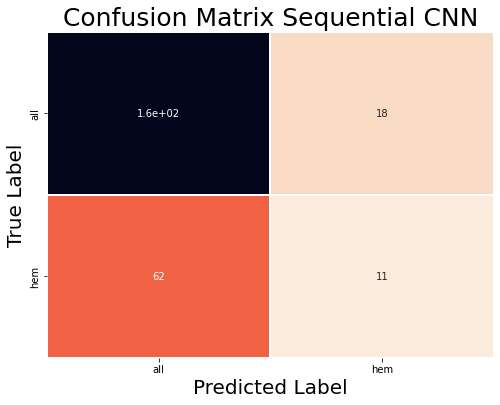

In [ ]:
class_names = validation_generator.class_indices

y_test_labels = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_test_labels, y_predict)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat,
            annot=True,
            cbar=False,
            xticklabels = class_names,
            yticklabels = class_names,
            cmap = "rocket_r",
            linewidths = 1)
plt.title('Confusion Matrix Sequential CNN', 
          size = 25, 
          y = 1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

This is the end of the report. Please proceed to read the final report on the ResNet50V2 model.